Minimum Length: 200
Maximum Length: 486137
Mean Length: 2337.8467986445517
Histogram Distribution: [  94   97 1901 ...    0    0    1]


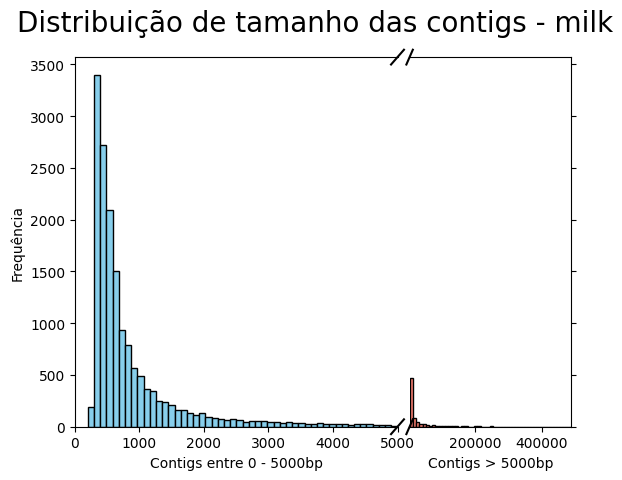

In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt

# File path
#file_path = 'contig_info_milk.txt'
file_path = 'fasta_headers.txt'

# Open and read the file
with open(file_path, 'r') as file:
    content = file.readlines()

# Extract 'len' values using regex
lens = [int(re.search(r'len=(\d+)', line).group(1)) for line in content if 'len=' in line]

# Calculate metrics
len_min = np.min(lens)
len_max = np.max(lens)
len_mean = np.mean(lens)
len_distribution, bin_edges = np.histogram(lens, bins='auto')  # Distribution in auto bins for histogram

# Display results
print("Minimum Length:", len_min)
print("Maximum Length:", len_max)
print("Mean Length:", len_mean)
print("Histogram Distribution:", len_distribution)

# Define threshold for splitting data
threshold = 5000

# Split data
data_below_threshold = np.array(lens)[np.array(lens) <= threshold]
data_above_threshold = np.array(lens)[np.array(lens) > threshold]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [2, 1]})
fig.subplots_adjust(wspace=0.05)

# Plot histogram for data below the threshold
ax1.hist(data_below_threshold, bins=50, color='skyblue', edgecolor='black')
ax1.set_xlim(0, threshold)
ax1.set_xlabel(f'Contigs entre 0 - {threshold}bp')
ax1.set_ylabel('Frequência')

# Plot histogram for data above the threshold
ax2.hist(data_above_threshold, bins=50, color='salmon', edgecolor='black')
ax2.set_xlim(threshold, len_max)  # Set the limit to the max value from your data
ax2.set_xlabel(f'Contigs > {threshold}bp')

# Add "gap" in x-axis
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()

# Add slashes to show the "break" in the x-axis
d = .02  # Size of break
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # Switch to the right axes
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

plt.suptitle("Distribuição de tamanho das contigs - milk", fontsize = 20)

histogram_path = 'histogram_len_distribution_gut.png'
plt.savefig(histogram_path)
# Show the plot
plt.show()
